In [106]:
import pandas as pd
import numpy as np
import openpyxl
import importlib
import matplotlib.pyplot as plt

In [86]:
df_exsams = pd.read_excel('https://raw.githubusercontent.com/tarek-mahran/Anaconda-Scripts/main/Full_PCM_History.xlsx', 0)

In [87]:
# df_exsams.shape

In [88]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
df_exsams

,Status,Task ID,Order ID,TT ID,TT Type,Region,Site ID,Site Name,Root Cause,Sub Cause,...,Departed,Arrived,FME Request,Completed,User Action,Updated Owner,Resolved Owner,Escalated To,Skill,Sub Project
0,Request_Resolved,CM20230328000001,PCM-20230328-00000004,TT-20230328-00003,Reference_telecom,Region_6,BSH0071,BSH0071,Equipment,SFP_BTS,...,NaN,NaN,03/28/2023 19:43:04,NaN,Ansir Iqbal Muhammad Iqbal,NaN,NaN,NaN,Telecom,Zain
1,Delivered,CM20230328000002,PCM-20230328-00000005,TT-20230328-00004,Telecom,Region_6,AB1-ASG-01,AB1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Telecom,Zain
2,Delivered,CM20230328000003,PCM-20230328-00000007,TT-20230327-02327,EM,Region_5,MAK1M8523,MAK2523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Telecom,Zain
3,Escalated,CM20230328000004,PCM-20230328-00000008,TT-20230327-02369,EM,Region_6,JIZ1M7242,JIZ0242,NaN,NaN,...,NaN,NaN,NaN,NaN,Moustafa fared,NaN,NaN,FLM_TE,EM,PIF
4,Request_Resolved,CM20230328000005,PCM-20230328-00000010,TT-20230328-00005,Reference_telecom,Region_4,JED1M7490,JED0490,Equipment,CB_BTS,...,03/28/2023 01:06:18,03/28/2023 01:06:20,03/28/2023 06:07:52,NaN,BARKAT ALI MAIN HILAL,NaN,NaN,NaN,Telecom,Zain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,Escalated,CM20230328001720,PCM-20230328-00002165,TT-20230328-02295,Telecom,Region_3,MDN6070,MDN6070,NaN,NaN,...,NaN,NaN,NaN,NaN,Mohammed Abdul Sami,NaN,NaN,BO_BSS,Telecom,Zain
1720,Dispatched,CM20230328001721,PCM-20230328-00002166,TT-20230328-02277,Telecom,Region_6,ARS0014,ARS0014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EM,Zain
1721,NOC_Resolved,CM20230328001722,PCM-20230328-00002167,TT-20230328-02285,EM,Region_1,HFR2M2378,HFR2378,Enviroment,No Battery Bank/Sceco,...,NaN,NaN,NaN,03/29/2023 01:24:13,Ahmed Atef Hassan,NaN,Vandalism,NaN,EM,PIF
1722,Dispatched,CM20230328001723,PCM-20230328-00002168,TT-20230328-02296,Reference_telecom,Region_5,MAK0116,MAK0116,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Telecom,Zain


In [89]:
ptable = df_exsams.pivot_table(index="Region", columns="Power Type",  aggfunc="size", fill_value=0, margins=False)

In [90]:
ptable.to_excel('Pivot Table.xlsx', 'Pivot_Data', startrow=2)

In [91]:
ptable

Power Type,Generator_DG,Generator_SG,Power Cube,Sceco,Sceco_STB
Region,,,,,
Region_1,17,57,22,125,13
Region_2,6,25,11,203,14
Region_3,5,6,4,75,30
Region_4,33,80,0,379,26
Region_5,2,47,0,179,18
Region_6,9,55,0,244,37


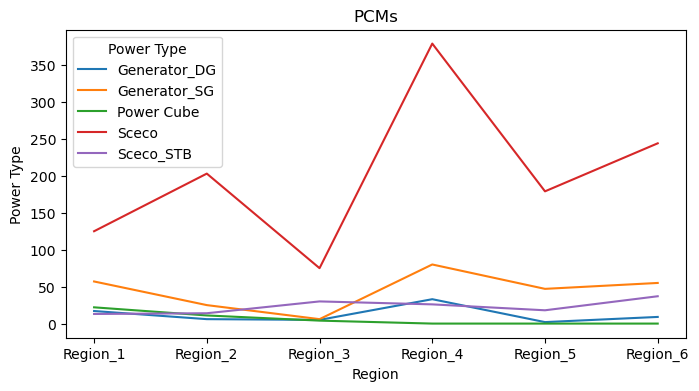

In [108]:
ptable.plot(kind='line', xlabel='Region', ylabel='Power Type', title='PCMs', figsize=(8,4))
plt.savefig('line.png')
plt.show()

In [93]:
ptable_region4 = ptable[ptable.index.isin(['Region_4'])]
ptable_region4

Power Type,Generator_DG,Generator_SG,Power Cube,Sceco,Sceco_STB
Region,,,,,
Region_4,33,80,0,379,26


In [94]:
ptable_region4_t = ptable_region4.T
ptable_region4_t

Region,Region_4
Power Type,
Generator_DG,33
Generator_SG,80
Power Cube,0
Sceco,379
Sceco_STB,26


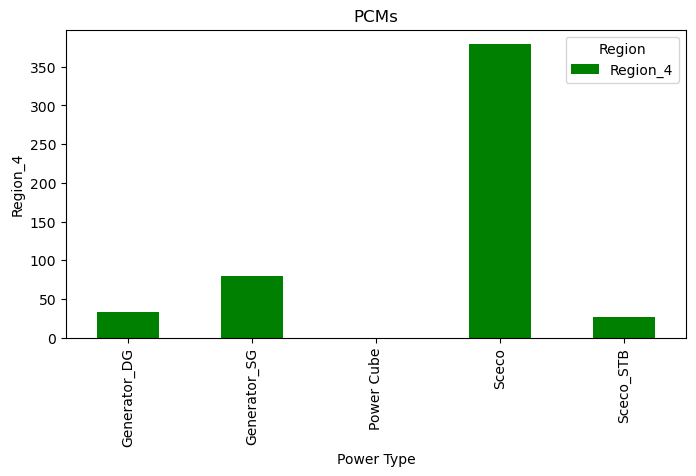

In [113]:
ptable_region4_t.plot(kind='bar', color='green', xlabel='Power Type', ylabel='Region_4', title='PCMs', figsize=(8,4))
plt.savefig('region_4.png')
plt.show()

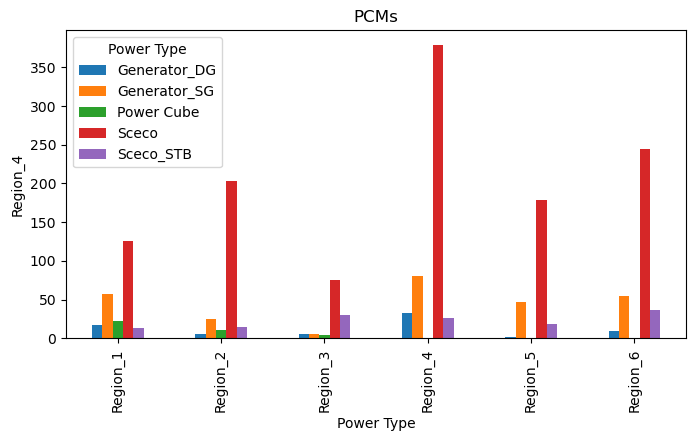

In [116]:
ptable.plot(kind='bar', xlabel='Power Type', ylabel='Region_4', title='PCMs', figsize=(8,4))
plt.savefig('bar.png')
plt.show()

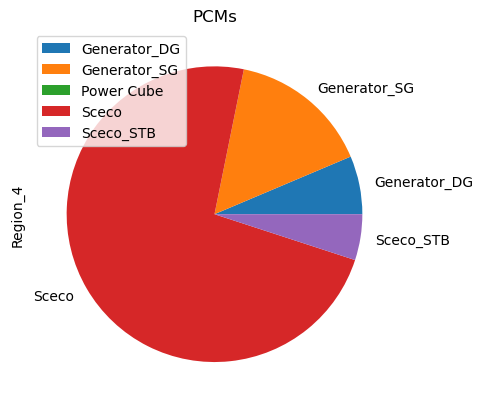

In [114]:
ptable_region4_t.plot(kind='pie', y='Region_4', title='PCMs')
plt.savefig('pie.png')
plt.show()